# Analiza 1000 družabnih iger z najvišjo oceno strani
Poglejmo si podatke o tisoč družabnih igrah z najvišjo oceno na spletni strani [BoardGameGeek](https://boardgamegeek.com/browse/boardgame).

## Začetne priprave
Uvozimo ustrezna paketa ter datoteko za analizo strani. V datoteki igre.csv so za vsako družabno igro shranjeni naslednji podatki:
- rang (mesto na seznamu, glede na oceno strani), 
- naslov,
- opis,
- leto nastanka,
- ocena strani,
- povprečna ocena,
- število glasov,

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline

In [48]:
igre = pd.read_csv('igre.csv', index_col="rang")

V tabelo še dodamo en stolpec s podatkom o desetletju izida, ki nam bo pomagal pri analizi podatkov.

In [49]:
def izracunaj_desetletje(stevilo):
    return 10 * (stevilo // 10)

igre['desetletje'] = igre['leto'].apply(izracunaj_desetletje)

Poglejmo si kako zdaj zgleda tabela.

In [50]:
igre

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.414,8.59,47473,2010
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.52,54001,2010
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.346,8.58,62863,2010
4,Ark Nova,2021,"Plan and build a modern, scientifically manage...",8.338,8.54,45614,2020
5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.238,8.59,24348,2010
...,...,...,...,...,...,...,...
996,Stella: Dixit Universe,2021,Players confront each other with word-images a...,6.619,7.31,3626,2020
997,Tragedy Looper,2011,"Players live, die, and repeat in order to outw...",6.619,7.18,4603,2010
998,Call to Adventure,2019,"Hero or Foe? You decide in this tile chucking,...",6.619,7.08,6408,2010


## 3.1 Igre z več glasovi imajo višjo povprečno oceno.
Poglejmo si kako število glasov, ki jih je dobila igra vpliva na povprečno oceno. Oziroma lahko si pogledamo, če je med tema podatkoma sploh kakšna povezava. Podatke o igrah razvrstimo na 50 podskupin glede na število glasov pri igri. Tako bodo v podskupini 0 igre, katere so izmed vseh dobile najmanj glasov, v podskupini 49 pa te z največ glasovi.

In [51]:
igre_1 = igre.copy()
igre_1['glasovi_na_50_delov'] = pd.qcut(igre_1['stevilo_glasov'], 50, labels=False)
povprecja_po_delih = igre_1.groupby('glasovi_na_50_delov', observed=True)['povprecna_ocena'].mean()
igre_1['Povprecna_ocena_po_delih'] = igre_1['glasovi_na_50_delov'].map(povprecja_po_delih)
igre_1


,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje,glasovi_na_50_delov,Povprecna_ocena_po_delih
rang,,,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.414,8.59,47473,2010,47,7.649000
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.52,54001,2010,48,7.772000
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.346,8.58,62863,2010,48,7.772000
4,Ark Nova,2021,"Plan and build a modern, scientifically manage...",8.338,8.54,45614,2020,47,7.649000
5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.238,8.59,24348,2010,43,7.567500
...,...,...,...,...,...,...,...,...,...
996,Stella: Dixit Universe,2021,Players confront each other with word-images a...,6.619,7.31,3626,2020,6,7.607000
997,Tragedy Looper,2011,"Players live, die, and repeat in order to outw...",6.619,7.18,4603,2010,12,7.455000
998,Call to Adventure,2019,"Hero or Foe? You decide in this tile chucking,...",6.619,7.08,6408,2010,20,7.410000


Da si dobljene rezultate lažje predstavljamo, iz njih naredimo graf o povprečni oceni za posamezno podskupino.

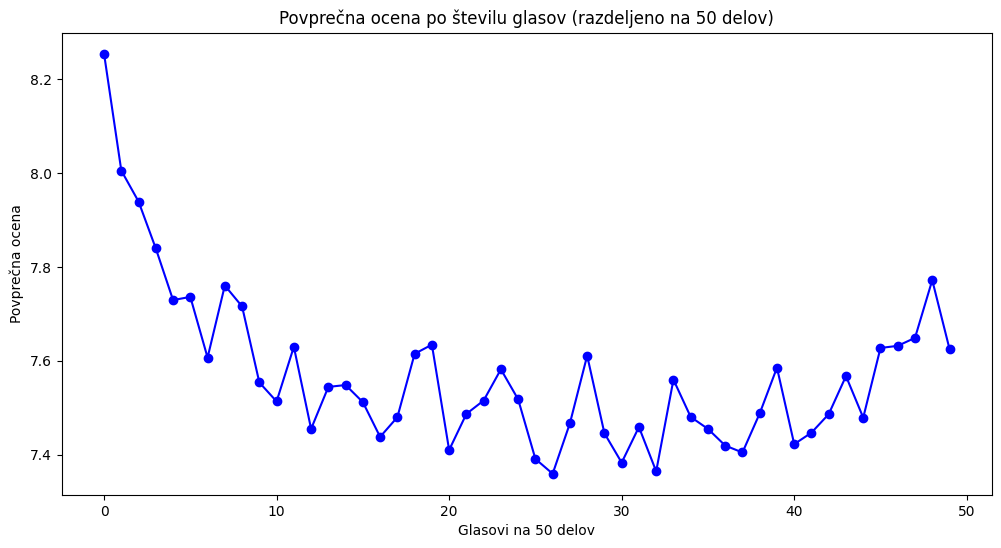

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(povprecja_po_delih.index, povprecja_po_delih.values, marker='o', linestyle='-', color='b')
plt.xlabel('Glasovi na 50 delov')
plt.ylabel('Povprečna ocena')
plt.title('Povprečna ocena po številu glasov (razdeljeno na 50 delov)')
plt.show()


S prikazanim grafom je jasno, da z večjim številom glasov ne narašča tudi povprečna ocena igre. Vidi se tudi, da med danima podatkoma ni neke povezave.

Lahko se dodatno prepričamo, če obstaja kakšna linearna povezava med številom glasov in povprečno oceno, zato bomo izračunali korelacijski koeficient. Če je korelacijski koeficient blizu 1, obstaja močna pozitivna linearna povezava, ki bi podprla hipotezo.
Če je korelacija blizu 0, ni jasne linearne povezave.Če je korelacija negativna, potem igre z več glasovi nimajo višje povprečne ocene.

In [53]:
korelacija = igre_1['stevilo_glasov'].corr(igre_1['povprecna_ocena'])

print(f'Korelacija med številom glasov in povprečno oceno: {korelacija}')

Korelacija med številom glasov in povprečno oceno: -0.014803206586168495


Tudi korelacija nam pove, da ni jasne linearne povezave, zato lahko to hipotezo OVRŽEMO.



### 3.2 